In [1]:
%%capture
%cd ..

In [2]:
import torch
from PIL import Image
import torchvision.transforms.functional as TF

from taesd import TAESD

dev = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print("Using device", dev)
taesd = TAESD().to(dev)

Using device mps


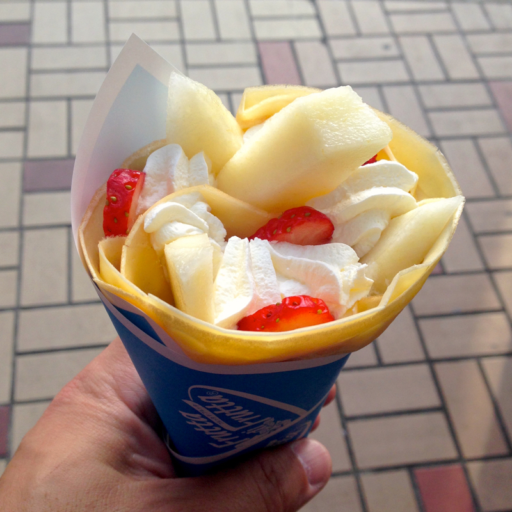

In [3]:
!wget -q https://upload.wikimedia.org/wikipedia/commons/9/9c/Crepe_with_LaFrance_and_strawberries_and_fresh_cream_in_it.jpg -O test_image.jpg
test_image = TF.center_crop(TF.resize(Image.open("test_image.jpg").convert("RGB"), 512), 512)
display(test_image)

input image (3, 512, 512)            (min +0.0000 / mean +0.5636 / max +1.0000)


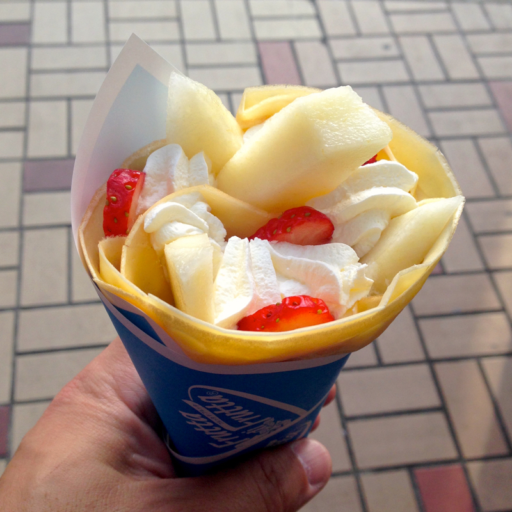

latents (4, 64, 64)              (min -3.4019 / mean +0.1942 / max +5.0042)
(these latents are the same size / scale as SD UNet-generated latents - no extra scale_factor is needed)


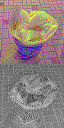

decoded image (3, 512, 512)            (min +0.0000 / mean +0.5647 / max +1.0000)


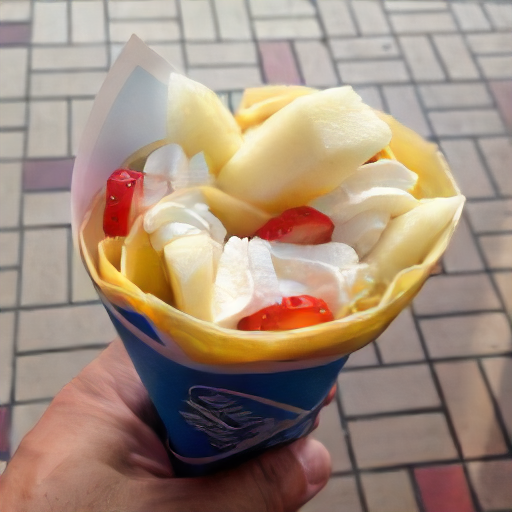

In [4]:
def summarize_tensor(x):
    return f"\033[34m{str(tuple(x.shape)).ljust(24)}\033[0m (\033[31mmin {x.min().item():+.4f}\033[0m / \033[32mmean {x.mean().item():+.4f}\033[0m / \033[33mmax {x.max().item():+.4f}\033[0m)"

def latent_to_visualization(latent):
    latent = TAESD.scale_latents(latent)
    return torch.cat([latent[:3], latent[3:].expand(3, *latent.shape[-2:])], -2)

def demo_taesd_on_image(taesd, image, dev):
    image_raw = TF.to_tensor(image).unsqueeze(0).to(dev)
    image_enc = taesd.encoder(image_raw)
    image_dec = taesd.decoder(image_enc).clamp(0, 1)
    
    print("input image", summarize_tensor(image_raw[0]))
    display(TF.to_pil_image(image_raw[0]))

    print("latents", summarize_tensor(image_enc[0]))
    print("(these latents are the same size / scale as SD UNet-generated latents - no extra scale_factor is needed)")
    display(TF.to_pil_image(latent_to_visualization(image_enc[0])))
    
    print("decoded image", summarize_tensor(image_dec[0]))
    display(TF.to_pil_image(image_dec[0]))

demo_taesd_on_image(taesd, test_image, dev)